In [329]:
import tensorflow as tf
import os

In [330]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [331]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [332]:
import cv2
import imghdr

In [333]:
data_dir = 'data'

In [334]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [335]:
os.listdir(os.path.join(data_dir, 'happy'))

['5Hoq5twItmrrW76KaBPuyhV9Kt0.jpg',
 'Xa8PkIv-ZvVyRAT-cbEKYSWj8h4.jpg',
 '_Xvo363ok2lIceenCvKNta0_roc.jpg',
 'cfeVf2-uV0hUo3ToTbLjztuomWk.jpg',
 'hx-eea1zqtCz4K0bW2uH_oN7Fs4.jpg',
 'image.jpeg',
 'image2.jpeg',
 'image3.jpeg',
 'image4.jpeg',
 'image5.jpeg',
 'image6.jpeg',
 'image7.jpeg',
 'image8.jpeg',
 'image9.jpeg',
 'image10.jpeg',
 'image11.jpeg',
 'image12.jpeg',
 'image13.jpeg',
 'image14.jpeg',
 'image15.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 'image18.jpeg',
 'image19.jpeg',
 'image20.jpeg',
 '95z5wMy4UcfbSSSlSw780vQ5jKA.jpg',
 'dbmNS45xQvD1diApY1T2HExvOo8.jpg',
 'GJDmKr3_TS3Qpm6KEL9UKUQKUO4.jpg',
 'bhUEIdQFwbS_E8PotYL_6_ogXWQ.jpg',
 'C1RJWeigizKlYCJZAy04inahSKM.jpg',
 'ln5TQq6AIWfcBlduDk-5bnaJMpY.jpg',
 'lvCKZ07bEYtoYmY62ifMzVa0RIE.jpg',
 'ni3MyKKVu9pK0SgY6gb6Z2NOGpg.jpg',
 'oUsYRFl3xbV2u1ij56Q1bxZweec.jpg',
 'OIP.-jKTwgi5GAcrKAOJuIgHmgHaD6.jpg',
 'OIP.-Pk-LuvrIJwW1fkJmLG7vwHaGV.jpg',
 'OIP.-oSNh4fUJBzOZgZ6-ltZOAHaFT.jpg',
 'OIP.27M_efahCbawUKwT3YgWGwHaEK.jpg',
 'OIP.1mMc

In [336]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print("image not in ext list {}".format(image_path))
                os.remove(image_path)

        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# image_extensions = [".png", ".jpg"]  # add there all your images file extensions
# Path = os.listdir(os.path.join(data_dir, image_class))
# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.remove(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
                

In [337]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [338]:
import numpy as np
import matplotlib.pyplot as plt

In [339]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 348 files belonging to 2 classes.


In [340]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [341]:
data_iterator = data.as_numpy_iterator()

## Ignore Whatever is Next

In [342]:
#batch = data_iterator.next()

In [343]:
#batch[0].shape

In [344]:
#batch[1]

In [345]:
# fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [346]:
# batch

### Start Again here


In [347]:
data = data.map(lambda x, y: (x / 255, y))

In [348]:
scaled_iterator = data.as_numpy_iterator()

In [349]:
batch = scaled_iterator.next()

### Splitting Data

In [350]:
len(data)


11

In [351]:
train_size = int(len(data) * 0.6)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data)*0.1) + 1

In [352]:
print(val_size, train_size, test_size)

3 6 2


In [353]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [354]:
len(test)

2

### Deep Learning


In [355]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [356]:
model = Sequential()


In [357]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

In [358]:
model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [359]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [360]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [361]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [362]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 11s 1s/step - loss: 0.8951 - accuracy: 0.4427 - val_loss: 0.6681 - val_accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 9s 1s/step - loss: 0.6467 - accuracy: 0.6823 - val_loss: 0.6158 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 9s 1s/step - loss: 0.6497 - accuracy: 0.6875 - val_loss: 0.6248 - val_accuracy: 0.6875
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.6286 - accuracy: 0.6771 - val_loss: 0.5974 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 9s 1s/step - loss: 0.5839 - accuracy: 0.7031 - val_loss: 0.5319 - val_accuracy: 0.7188
Epoch 6/20
6/6 [==============================] - 12s 2s/step - loss: 0.5614 - accuracy: 0.7083 - val_loss: 0.5831 - val_accuracy: 0.7500
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 0.5452 - accuracy: 0.7240 - val_loss: 0.5078 - val_accuracy: 0.7604
Epoch 8/20
6/6 [======================

In [363]:
hist.history

{'loss': [0.8951003551483154,
  0.6467441320419312,
  0.6497122645378113,
  0.6285609602928162,
  0.5838775038719177,
  0.5614368319511414,
  0.545222282409668,
  0.5285750031471252,
  0.4645163118839264,
  0.4644387662410736,
  0.45763516426086426,
  0.37188413739204407,
  0.3452926576137543,
  0.37656059861183167,
  0.40993213653564453,
  0.3147011995315552,
  0.2572523355484009,
  0.2523511052131653,
  0.30459991097450256,
  0.2996843159198761],
 'accuracy': [0.4427083432674408,
  0.6822916865348816,
  0.6875,
  0.6770833134651184,
  0.703125,
  0.7083333134651184,
  0.7239583134651184,
  0.75,
  0.7447916865348816,
  0.7760416865348816,
  0.765625,
  0.8541666865348816,
  0.8177083134651184,
  0.796875,
  0.8177083134651184,
  0.8541666865348816,
  0.890625,
  0.8802083134651184,
  0.8333333134651184,
  0.890625],
 'val_loss': [0.668051540851593,
  0.6158135533332825,
  0.6248237490653992,
  0.5974277257919312,
  0.5318860411643982,
  0.5830897688865662,
  0.5077535510063171,
  0.4

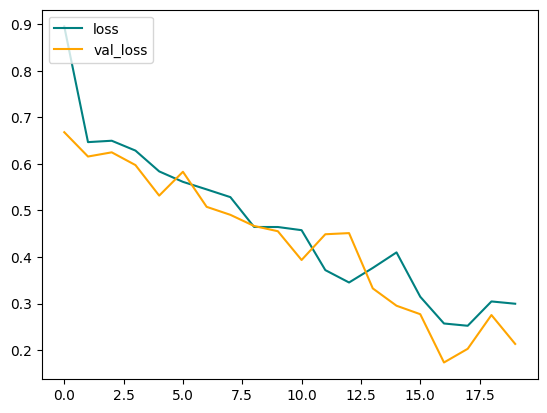

In [364]:
plot = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

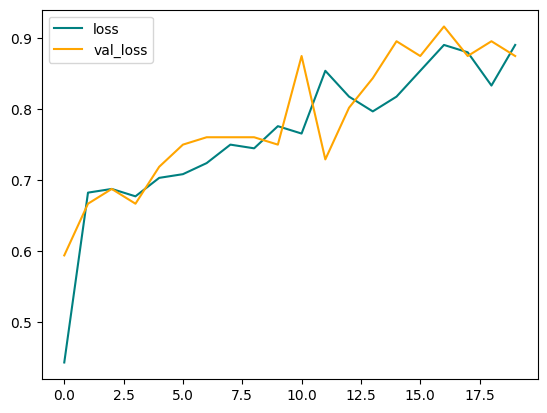

In [365]:
plot = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate performance


In [366]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [367]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [368]:
len(test)

2

In [369]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 242ms/step


In [371]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.9047619104385376, Accuracy:0.9666666388511658


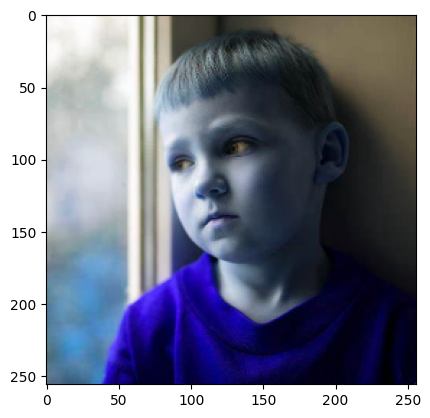

In [384]:
img = cv2.imread('./data/sadboi.jpg')
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [385]:
np.expand_dims(resize, 0)

array([[[[246.81871  , 244.81871  , 243.81871  ],
         [245.57422  , 243.57422  , 242.57422  ],
         [245.57422  , 243.57422  , 242.57422  ],
         ...,
         [112.08984  ,  99.08984  ,  77.08984  ],
         [114.46484  , 101.46484  ,  79.46484  ],
         [118.       , 105.       ,  83.       ]],

        [[245.57422  , 243.57422  , 242.57422  ],
         [244.52223  , 242.52223  , 241.52223  ],
         [244.09315  , 242.09315  , 241.09315  ],
         ...,
         [109.23828  ,  96.23828  ,  74.23828  ],
         [111.61328  ,  98.61328  ,  76.61328  ],
         [116.44531  , 103.44531  ,  81.44531  ]],

        [[245.75801  , 243.75801  , 242.75801  ],
         [244.85156  , 242.85156  , 241.85156  ],
         [244.25781  , 242.25781  , 241.25781  ],
         ...,
         [107.64453  ,  94.64453  ,  72.64453  ],
         [110.01953  ,  97.01953  ,  75.01953  ],
         [113.87109  , 100.87109  ,  78.87109  ]],

        ...,

        [[ 97.109375 , 118.109375 , 14

In [386]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 50ms/step


In [387]:
yhat

array([[0.14221008]], dtype=float32)